As we surely may enrich our dataset with the provided additional metadata about the speakers in the Quotebank dataset, we conducted some pre-processing on the Wikidata dataset.

This notebook is essentially used to pre-process the wikidata entites in order to possibly enrich the data with it in the Milestone 3.

## Mounting the Google drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Handling the data
Here is how we used to create the wikidata_labels data frame.

We first create the path and open the additional metadata about the speakers in the Quotebank dataset, and then we create the data frame

In [ ]:
PATH = "drive/MyDrive/"
df = pd.read_parquet(PATH + "Project datasets/speaker_attributes.parquet/part-00001-0d587965-3d8f-41ce-9771-5b8c9024dce9-c000.snappy.parquet", engine='pyarrow')
df

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,None,None,None,[Q6581097],985453603,None,None,None,None,None,Q45441526,Cui Yan,None,item,None
1,None,None,[Q9903],[Q6581097],1008699604,None,None,None,None,None,Q45441555,Guo Ziyi,None,item,None
2,None,None,[Q9903],[Q6581097],1008699709,None,None,None,None,None,Q45441562,Wan Zikui,None,item,None
3,None,None,[Q9903],[Q6581097],1008699728,None,None,None,None,None,Q45441563,Lin Pei,None,item,None
4,None,None,[Q9683],[Q6581097],985261661,None,None,None,None,None,Q45441565,Guan Zhen,None,item,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660353,None,None,None,None,1388244101,None,None,None,None,None,Q106134191,Leonhard Gans,None,item,None
660354,None,None,None,None,1388243838,None,None,None,None,None,Q106134200,André de Arena,None,item,None
660355,None,None,None,None,1388243780,None,None,None,None,None,Q106134203,Andreas Byssmann,None,item,None
660356,None,None,None,None,1388243759,None,None,None,None,None,Q106134204,Johannes,None,item,None


In [ ]:
wikidata_labels = pd.read_csv(PATH + 'Project datasets/wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

In [ ]:
wikidata_labels.loc['Q31']['Label']

'Belgium'

## Wikidata Labels



In [ ]:
wikidata_labels

,Label,Description
QID,,
Q31,Belgium,country in western Europe
Q45,Portugal,country in southwestern Europe
Q75,Internet,global system of connected computer networks
Q148,People's Republic of China,sovereign state in East Asia
Q155,Brazil,country in South America
...,...,...
Q106302506,didgeridooist,musician who plays the didgeridoo
Q106341153,biochemistry teacher,teacher of biochemistry at any level
Q106368830,2018 Wigan Metropolitan Borough Council electi...,NaN


In order to properly use information from the Wikidata_Labels data frame, we implemented two functions: `Qids_to_tuple_words` and `Qids_to_words`. The first one returns a tuple of words that correspond to Qids. The second one returns pd.Series of data column filled by tuples of words. We use pd.Series of tuples because it allows to use '.unique()' method (pd.Series of lists or np.array does not allow).


In [ ]:
def Qids_to_tuple_words(tuple_qids, wikidata_labels):
    words = []
    for qid in tuple_qids:
        try:
	          words.append(wikidata_labels.loc[qid]['Label'])
        except:
	          print(qid + " is out of wikidata_labels")
    return tuple(words)

def Qids_to_words(df, column_name, wikidata_labels):
    df_c = df[column_name][df[column_name].notna()].copy()
    df_c = df_c.apply(lambda x: Qids_to_tuple_words(np.sort(x), wikidata_labels))
    return df_c

For example, let's see the occupation feature from the Wikidata_Labels data frame:

In [ ]:
occupations = Qids_to_words(df, 'occupation', wikidata_labels)

Q21550646 is out of wikidata_labels
Q13365117 is out of wikidata_labels
Q13365117 is out of wikidata_labels
Q13365117 is out of wikidata_labels
Q13365117 is out of wikidata_labels
Q13365117 is out of wikidata_labels
Q16287483 is out of wikidata_labels
Q16287483 is out of wikidata_labels
Q16287483 is out of wikidata_labels


Some Qids were not found in Wikidata_Labels Dataframe. We also did not find it in https://www.wikidata.org/.

In [ ]:
occupations

16                                            (researcher,)
60                                                  (poet,)
71                                            (politician,)
210                                                 (poet,)
280                                           (politician,)
                                ...                        
660340                                         (physician,)
660341                                        (researcher,)
660342    (activist, journalist, school teacher, writer,...
660343                                  (military officer,)
660346                                    (painter, drawer)
Name: occupation, Length: 384491, dtype: object

In [ ]:
occupations.unique()

array([('researcher',), ('poet',), ('politician',), ...,
       ('singer', 'vocalist', 'lyricist'),
       ('comedian', 'radio personality', 'data scientist', 'writer', 'scientist'),
       ('activist', 'journalist', 'school teacher', 'writer', "children's writer")],
      dtype=object)

In [ ]:
occupations.unique().shape

(20099,)

Let's look at the amounts of speaker's occupations

In [ ]:
num_occupations = occupations.apply(lambda x: len(x))

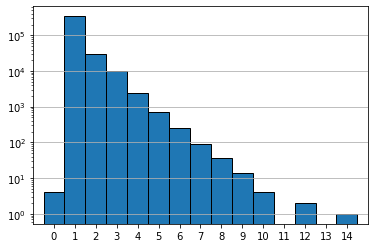

In [ ]:
max_num = num_occupations.max()
bins = np.arange(max_num + 2) - 0.5
plt.hist(num_occupations, bins, log=True, edgecolor="black")
plt.xticks(range(max_num + 1))
plt.xlim([-1, max_num + 1])
plt.grid(axis='y')

plt.show()

Zero amount of occupations means these Qids were not found in Wikidata_Labels Dataframe. \\
Let's look at occupations of a person with the most amount of occupations.

In [ ]:
occupations[num_occupations == num_occupations.max()].values[0]

('sigillographer',
 'prosaist',
 'professor',
 'university teacher',
 'numismatist',
 'historian',
 'playwright',
 'German scholar',
 'translator',
 'writer',
 'archaeologist',
 'teacher',
 'heraldist',
 'curator')

Here we can see some related occupations: 'professor', 'university teacher' and 'teacher'. These can be assigned to a more general occupation - 'teacher'.


## Conclusion

We can now properly augment our dataset with the corresponding labels to each wikidata search.